In [1]:
import math
import random
import matplotlib.pyplot as plt
import tqdm

class DBSCAN(object):

    STATUS_UNVISITED = 'unvisited'
    STATUS_VISITED = 'visited'

    STATUS_GROUP = 1
    STATUS_NOGROUP = 0

    data = dict()

    def __init__(self, e, minPts):
        """
        e 最小距离
        minPts 最少样本数量
        """
        self.e = e
        self.minPts = minPts

    def nearby(self, id):
        nearby_points = list()
        for link_id in range(len(self.scores[id])):
            if self.scores[id][link_id] <= self.e:
                nearby_points.append(link_id)

        return nearby_points

    def visit_nearby_points(self, points, group):
        for id in points:
            if self.data[id]['is_visited'] == self.STATUS_VISITED \
                    and self.data[id]['is_group'] == self.STATUS_GROUP:
                continue
            self.data[id]['is_visited'] = self.STATUS_VISITED

            if self.data[id]['is_group'] == self.STATUS_NOGROUP:
                group.append(id)
                self.data[id]['is_group'] = self.STATUS_GROUP

            nearby_points = self.nearby(id)
            return nearby_points  
        
    def fit(self, data_set, scores):
        self.scores = scores
        groups = list()

        for index, item in enumerate(data_set):
           self.data[index] = {'id': index,
                                'is_visited': self.STATUS_UNVISITED,
                                'is_group': self.STATUS_NOGROUP
                                }

        for id in self.data:
            # print(id)
            if self.data[id]['is_visited'] == self.STATUS_VISITED:
                continue
            self.data[id]['is_visited'] = self.STATUS_VISITED
            candidates=list()
            candidates.append(id)
            group = list()
            while len(candidates) > 0:
                now= candidates.pop(0)

                if self.data[now]['is_visited'] == self.STATUS_VISITED and self.data[now]['is_group'] == self.STATUS_GROUP:
                    continue
                self.data[now]['is_visited'] = self.STATUS_VISITED

                if self.data[now]['is_group'] == self.STATUS_NOGROUP:
                    group.append(now)
                    self.data[now]['is_group'] = self.STATUS_GROUP

                nearby_points = self.nearby(now)
                if len(nearby_points) >= self.minPts:
                    for p in nearby_points:
                        if self.data[p]['is_visited'] == self.STATUS_VISITED:
                            continue
                        elif self.data[p]['is_group'] == self.STATUS_GROUP:
                            continue
                        elif p in candidates:
                            continue
                        else:
                            candidates.append(p)
            if len(group) > 0:
                print(id)
                groups.append(group)
   
        
        for id in self.data:
            if self.data[id]['is_group'] == self.STATUS_NOGROUP:
                groups.append([id])

        return groups
    


def init_data(num, min, max):
    data = []
    for i in range(num):
        data.append([random.randint(min, max), random.randint(min, max)])

    return data


def mat_score(data_set):
    score = dict()
    for i in range(len(data_set)):
        score[i] = dict()

    for i in range(len(data_set) - 1):
        j = i + 1
        while j < len(data_set):
            score[i][j] = math.sqrt(abs(data_set[i][0] - data_set[j][0]) ** 2 + abs(data_set[i][1] - data_set[j][1]) ** 2)
            score[j][i] = score[i][j]
            j += 1

    return score


# def show_cluster(data_set, groups):
#     plt.title(u'DBSCAN')
#     mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
#     for index, group in enumerate(groups):
#         for i in group:
#             plt.plot(data_set[i][0], data_set[i][1], mark[index])

#     plt.xlim(0.0, 100)
#     plt.ylim(0.0, 100)
#     plt.show()



In [2]:
import numpy as np
dist = np.load('/data/wuxiao/score.npy')
Y = np.load('./datasets/2demb.npy')
print(max(dist[0]))
print(np.mean(dist[0]))

92.3456039428711
45.51266753147427


In [ ]:
model = DBSCAN(2,40)
cluster = model.fit(Y, dist)
cluster = np.array(cluster) 
np.save('dbscan', cluster)


[list([39, 276, 2069, 2196, 2243, 3699, 5242, 5312, 5449, 6252, 6311, 6599, 8110, 8286, 8340, 8648, 9592, 9683, 10432, 10463, 10507, 10970, 13417, 14159, 14186, 14947, 15001, 15246, 15837, 16862, 17287, 17963, 18018, 18464, 18596, 18995, 19178, 19344, 20841, 20844, 21023, 21201, 21513, 21666, 22610, 22725, 22959, 23520, 23930, 24142, 24373, 24521, 25357, 25438, 25721, 27258, 27338, 28384, 28625, 29658, 29902, 29939, 30312, 30459, 31395, 31595, 32466, 33166, 67, 3179, 15805, 17948, 22398, 23587, 4499, 8978, 18190, 19677, 20060, 23201, 24774, 27948, 33210, 10996, 10702, 5948])
 list([52, 967, 1503, 1618, 4615, 13135, 16263, 17673, 21797, 22899, 27446, 28033, 29733, 29736, 31277, 31647, 33633])
 list([93, 121, 819, 866, 1256, 1725, 1980, 2000, 2074, 2427, 2474, 2834, 2881, 3333, 4947, 5564, 5705, 6009, 6072, 6079, 6929, 7173, 7204, 7361, 7686, 7867, 8673, 8787, 8899, 9048, 9168, 9560, 9815, 10828, 11219, 12010, 12179, 12395, 12586, 12649, 13096, 13550, 13556, 13674, 14021, 14704, 14912, 1

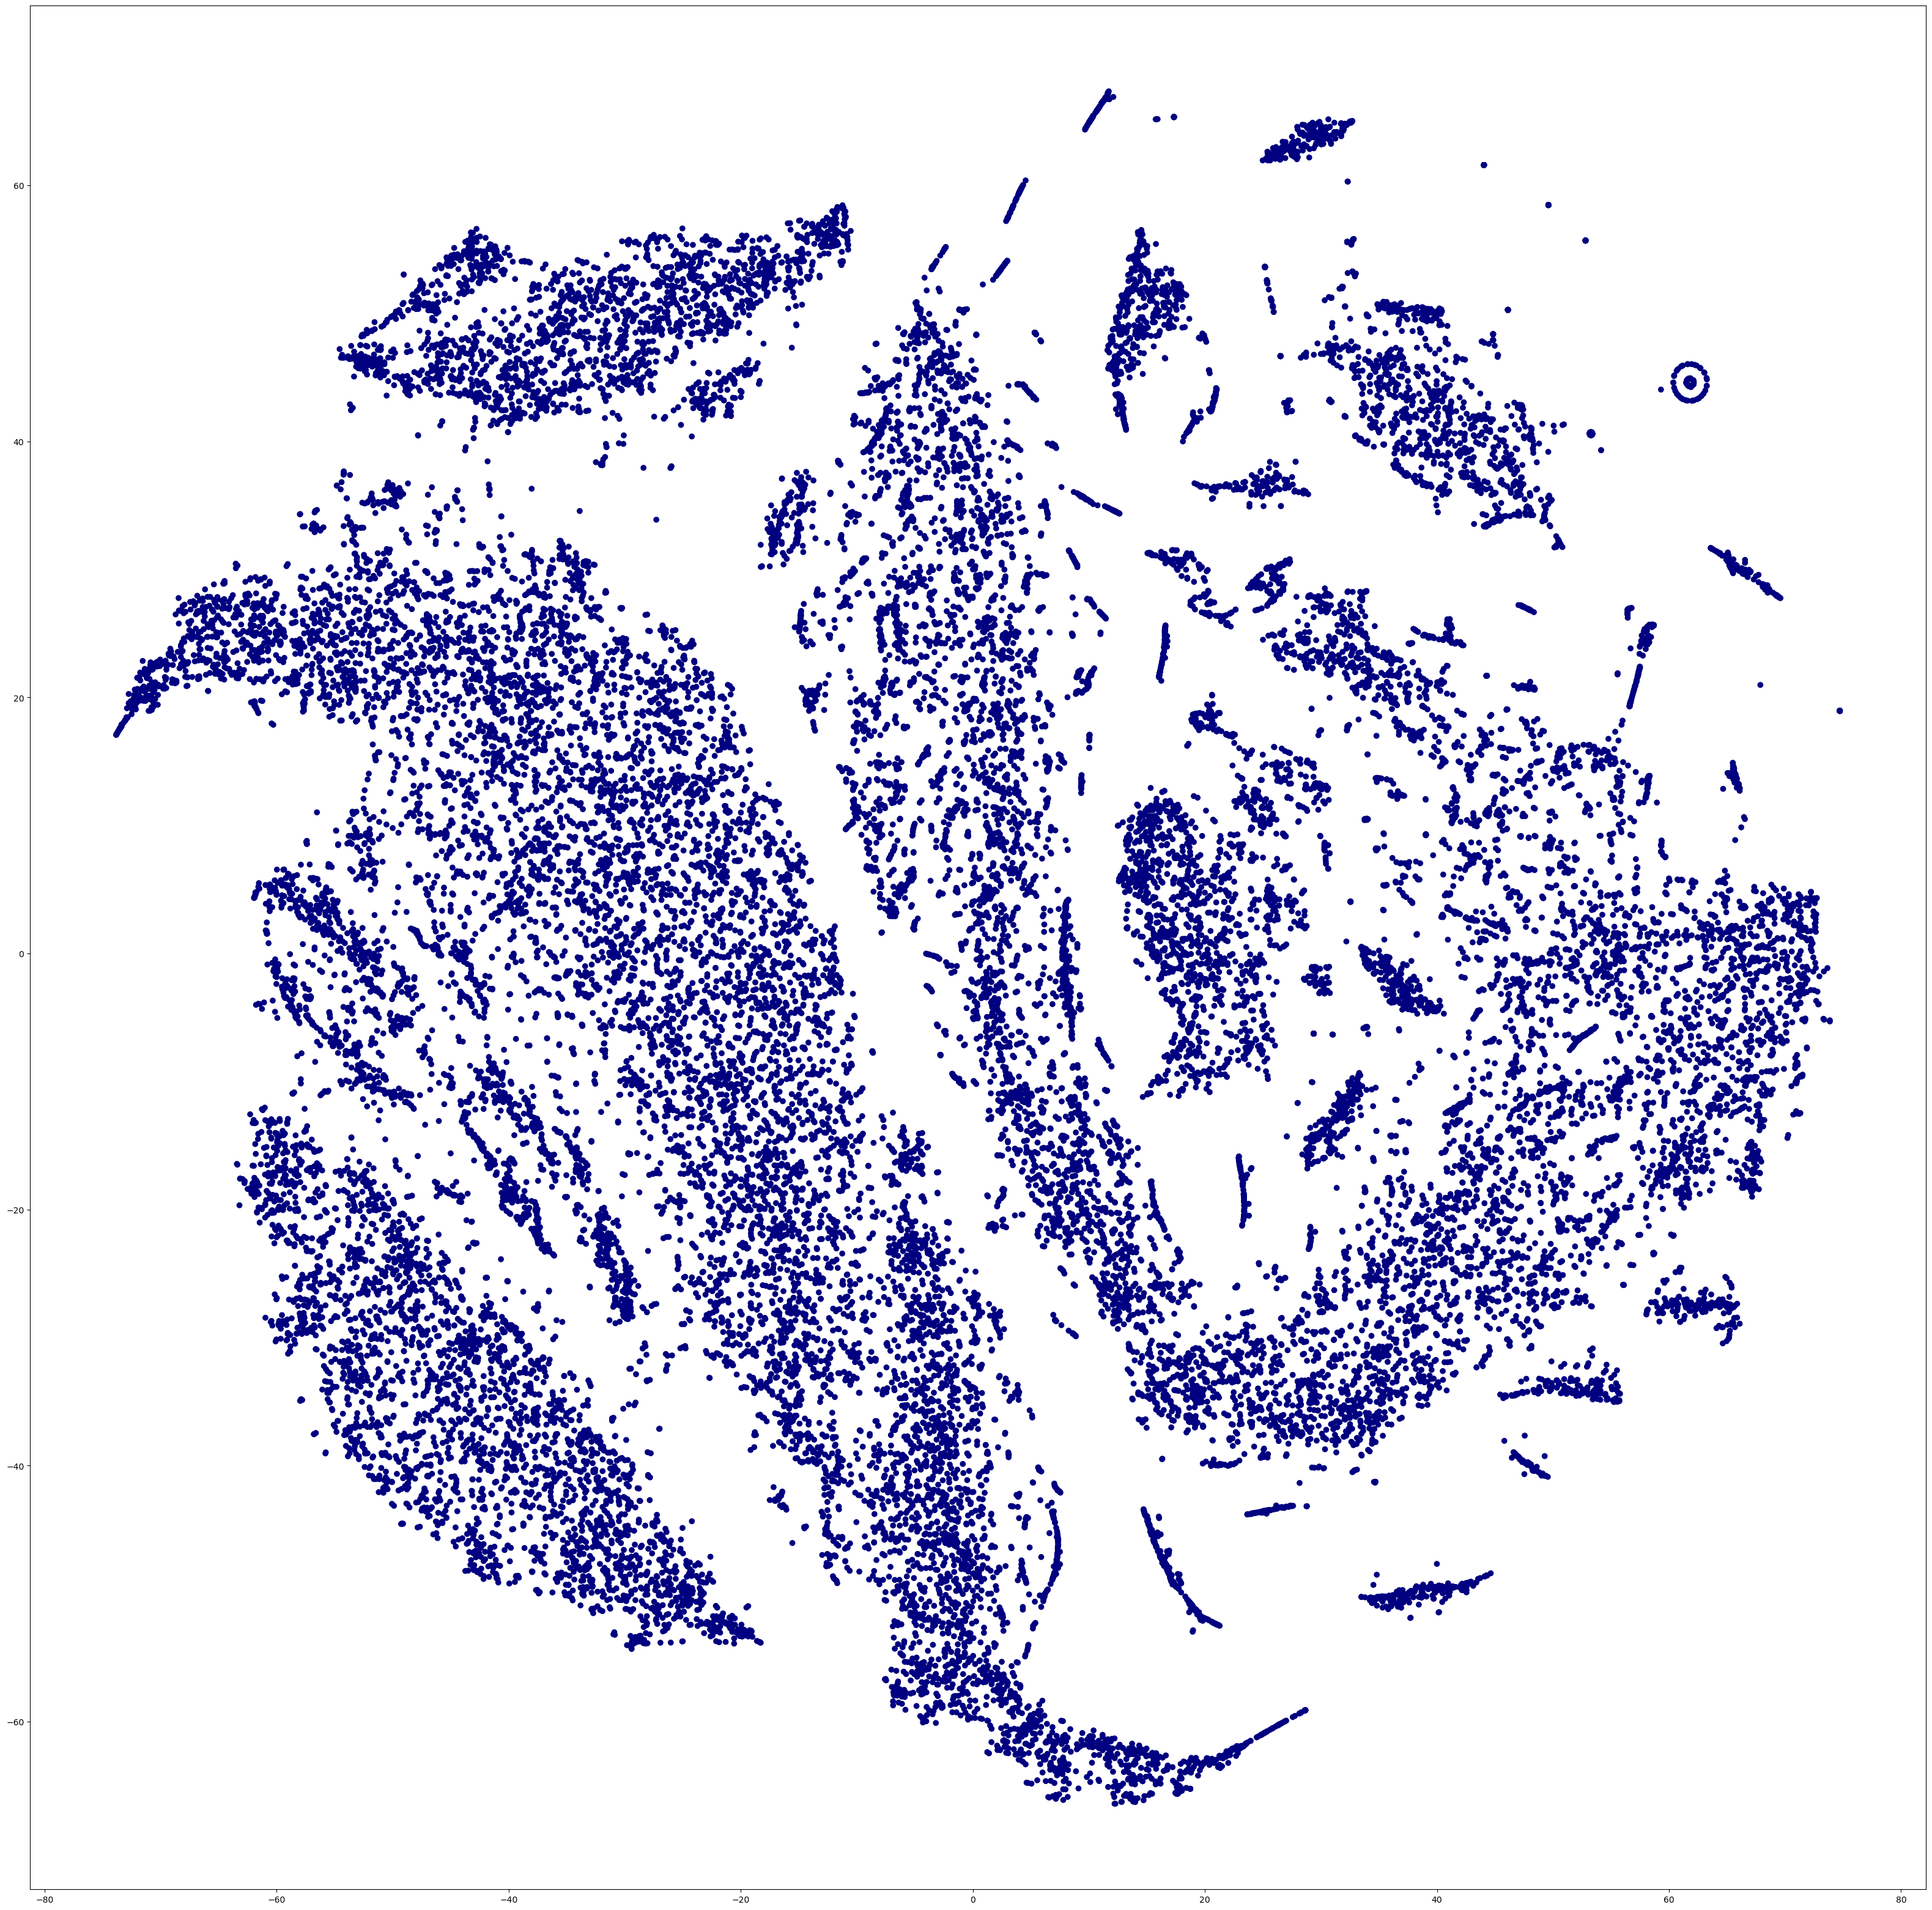

In [ ]:
# np.load("dbscan.npy")
print(cluster)
print(len(cluster))
labels=np.zeros(len(dist[0]),dtype=int)
for i in range(len(cluster)):
    for j in range(len(cluster[i])):
        print(cluster[i][j])
print(labels)
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(40,40))
plt.scatter(Y[:,0], Y[:,1], c=labels, cmap=matplotlib.cm.jet)